In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [26]:
df=pd.read_excel(r'C:\Users\rajki\Documents\Jumbo & Company_ Attach % .xls')
df.head()

,Branch,Store_Name,Dec,Nov,Oct,Sep,Aug
0,Delhi_Ncr,Delhi(Janakpuri) Br,0.23,0.17,0.16,0.25,0.24
1,Delhi_Ncr,Haryana(Gurgaon) Br,0.21,0.26,0.15,0.28,0.04
2,Delhi_Ncr,Up(Greater Noida) Br,0.25,0.36,0.30,0.41,0.43
3,Pune,Pune(Bhosari) Br,0.33,0.33,0.36,0.13,0.32
4,Gujarat,Ahmedabad(Maninagar) Br,0.19,0.11,0.14,0.21,0.17


In [27]:
df.shape

(163, 7)

In [28]:
df.isna().sum()

Branch        0
Store_Name    0
Dec           0
Nov           0
Oct           0
Sep           0
Aug           0
dtype: int64

## Analysis

In [29]:
df['Branch'].value_counts()

Branch
Delhi_Ncr    44
Telangana    40
Gujarat      24
Thane        20
Mumbai       19
Pune         16
Name: count, dtype: int64

In [30]:
# Store-wise Mean Claim analysis
df['Five month Mean']= (df['Dec']+ df['Nov']+ df['Oct'] +df['Sep']+ df['Aug'])/5
df.head()

,Branch,Store_Name,Dec,Nov,Oct,Sep,Aug,Five month Mean
0,Delhi_Ncr,Delhi(Janakpuri) Br,0.23,0.17,0.16,0.25,0.24,0.210
1,Delhi_Ncr,Haryana(Gurgaon) Br,0.21,0.26,0.15,0.28,0.04,0.188
2,Delhi_Ncr,Up(Greater Noida) Br,0.25,0.36,0.30,0.41,0.43,0.350
3,Pune,Pune(Bhosari) Br,0.33,0.33,0.36,0.13,0.32,0.294
4,Gujarat,Ahmedabad(Maninagar) Br,0.19,0.11,0.14,0.21,0.17,0.164


In [31]:
df.describe()

,Dec,Nov,Oct,Sep,Aug,Five month Mean
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,0.217239,0.217117,0.170920,0.167301,0.128589,0.180233
std,0.173270,0.131246,0.116125,0.134518,0.116640,0.103524
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.095000,0.130000,0.100000,0.080000,0.035000,0.117000
50%,0.200000,0.200000,0.160000,0.150000,0.110000,0.164000
75%,0.300000,0.295000,0.240000,0.245000,0.190000,0.235000
max,1.000000,0.700000,0.710000,0.800000,0.600000,0.622000


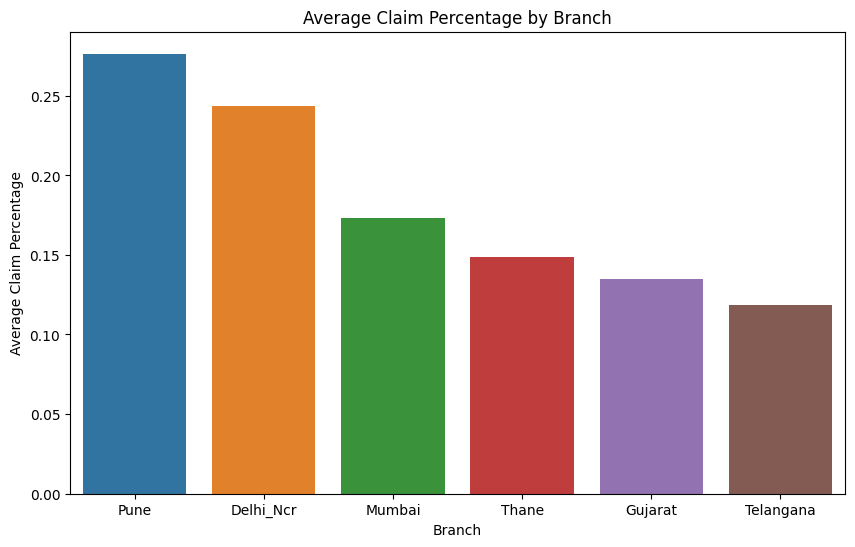

In [32]:
# Branch Analysis
query=df.groupby('Branch')['Five month Mean'].mean().reset_index().sort_values(by='Five month Mean', ascending=False)
query
plt.figure(figsize=(10,6))
sns.barplot(data=query, x='Branch', y='Five month Mean', hue='Branch', legend=False)
plt.title('Average Claim Percentage by Branch')
plt.ylabel('Average Claim Percentage')
plt.xlabel('Branch')
plt.show()

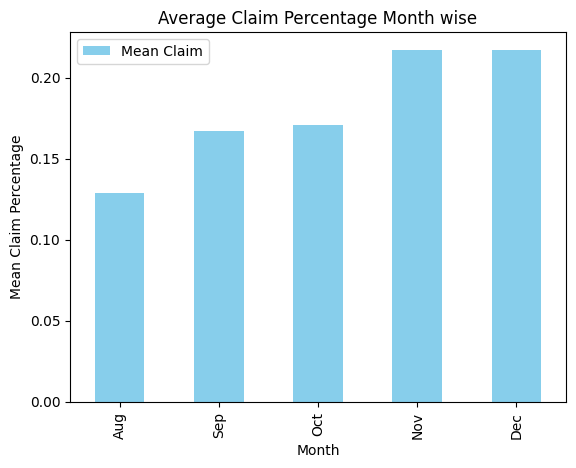

In [33]:
# Month wise Analysis
months=['Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_mean=df[months].mean().reset_index()
month_mean.columns=['Month', 'Mean Claim']
month_mean
month_mean.plot(x='Month', y='Mean Claim', kind='bar', color='skyblue')
plt.title('Average Claim Percentage Month wise')
plt.ylabel('Mean Claim Percentage')
plt.xlabel('Month')
plt.show()

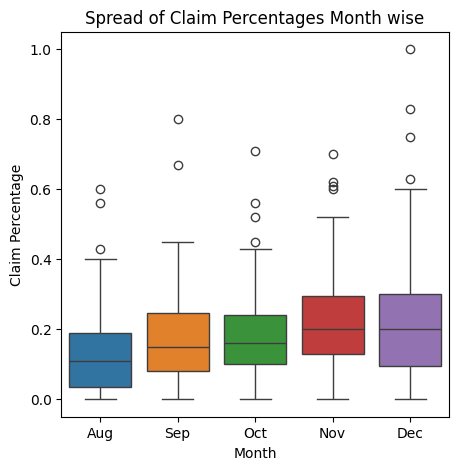

In [34]:
# spread of the claims month-wise
plt.figure(figsize=(5,5))
sns.boxplot(data=df[months])
plt.title('Spread of Claim Percentages Month wise')
plt.ylabel('Claim Percentage')
plt.xlabel('Month')
plt.show()

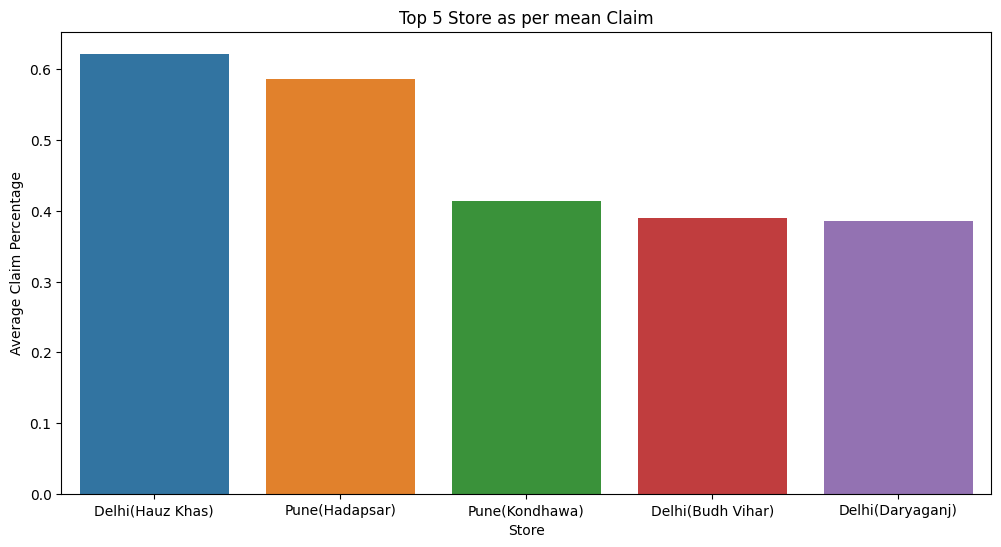

In [35]:
#Store-wise Claim Trend Analysis
store_claim_mean=df.groupby('Store_Name')['Five month Mean'].mean().reset_index().sort_values(by='Five month Mean', ascending=False)
top_5_stores=store_claim_mean.head(5)
plt.figure(figsize=(12,6))
sns.barplot(data=top_5_stores, x='Store_Name', y='Five month Mean', hue='Store_Name', legend=False)
plt.title("Top 5 Store as per mean Claim")
plt.ylabel('Average Claim Percentage')
plt.xlabel('Store')
plt.show()

## Rough Prediction

In [36]:
df.dtypes

Branch              object
Store_Name          object
Dec                float64
Nov                float64
Oct                float64
Sep                float64
Aug                float64
Five month Mean    float64
dtype: object

In [37]:
def pred_jan(values):
    y= np.array(values, dtype=float)
    x= np.arange(1,len(y)+1)
    m,c= np.polyfit(x,y,1)
    Jan= m*(len(y)+1)+c
    return Jan

jan_predictions = []

for _, row in df.iterrows():
    monthly_values = row[months].values
    jan_pred = pred_jan(monthly_values)
    jan_predictions.append(jan_pred)

df['Jan'] = jan_predictions

df.head()

,Branch,Store_Name,Dec,Nov,Oct,Sep,Aug,Five month Mean,Jan
0,Delhi_Ncr,Delhi(Janakpuri) Br,0.23,0.17,0.16,0.25,0.24,0.210,0.180
1,Delhi_Ncr,Haryana(Gurgaon) Br,0.21,0.26,0.15,0.28,0.04,0.188,0.284
2,Delhi_Ncr,Up(Greater Noida) Br,0.25,0.36,0.30,0.41,0.43,0.350,0.227
3,Pune,Pune(Bhosari) Br,0.33,0.33,0.36,0.13,0.32,0.294,0.360
4,Gujarat,Ahmedabad(Maninagar) Br,0.19,0.11,0.14,0.21,0.17,0.164,0.146


In [38]:
df.columns

Index(['Branch', 'Store_Name', 'Dec', 'Nov', 'Oct', 'Sep', 'Aug',
       'Five month Mean', 'Jan'],
      dtype='object')

In [39]:
months

['Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [ ]:
# Branch wise Aug-Jan visualization
Jan_df= df.groupby('Branch')[months+['Jan']].mean().reset_index()


,Branch,Aug,Sep,Oct,Nov,Dec,Jan
0,Delhi_Ncr,0.191364,0.227955,0.235227,0.280455,0.283409,0.314659
1,Gujarat,0.092917,0.131250,0.129167,0.128333,0.191250,0.192708
2,Mumbai,0.113684,0.185263,0.170526,0.215263,0.182632,0.223842
3,Pune,0.205000,0.243125,0.291250,0.355000,0.288125,0.359937
4,Telangana,0.069500,0.080000,0.086250,0.175250,0.180750,0.213675
5,Thane,0.104500,0.174000,0.153000,0.159500,0.152000,0.172750


In [43]:
months

['Aug', 'Sep', 'Oct', 'Nov', 'Dec']

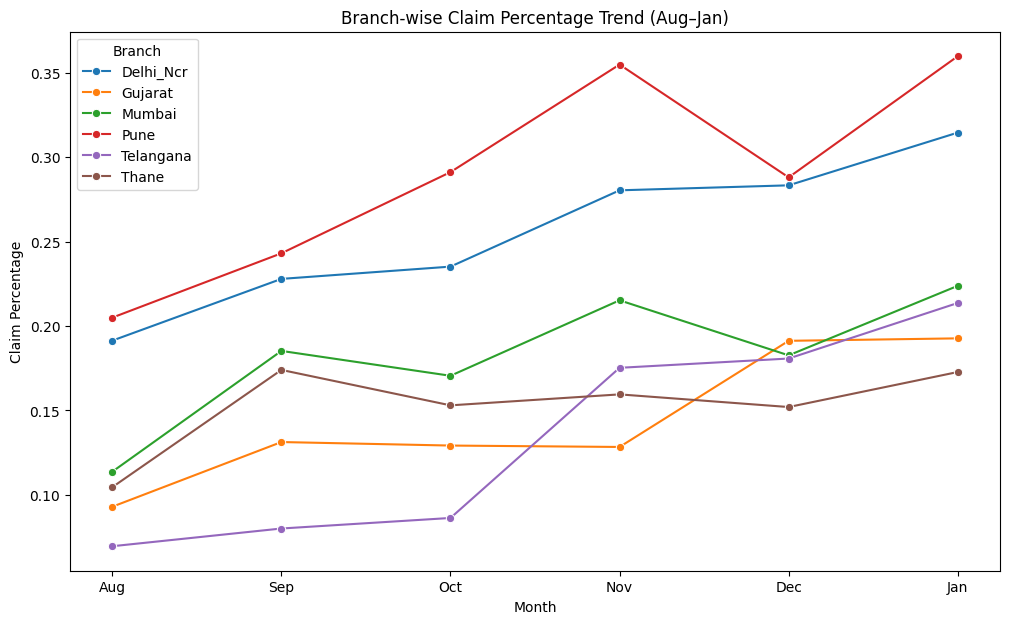

In [47]:
branch_monthly_melt = Jan_df.melt(
    id_vars='Branch',
    var_name='Month',
    value_name='Claim_Percentage'
)

plt.figure(figsize=(12,7))
sns.lineplot(
    data=branch_monthly_melt,
    x='Month',
    y='Claim_Percentage',
    hue='Branch',
    marker='o'
)

plt.title('Branch-wise Claim Percentage Trend (Aug–Jan)')
plt.xlabel('Month')
plt.ylabel('Claim Percentage')
plt.show()
